In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

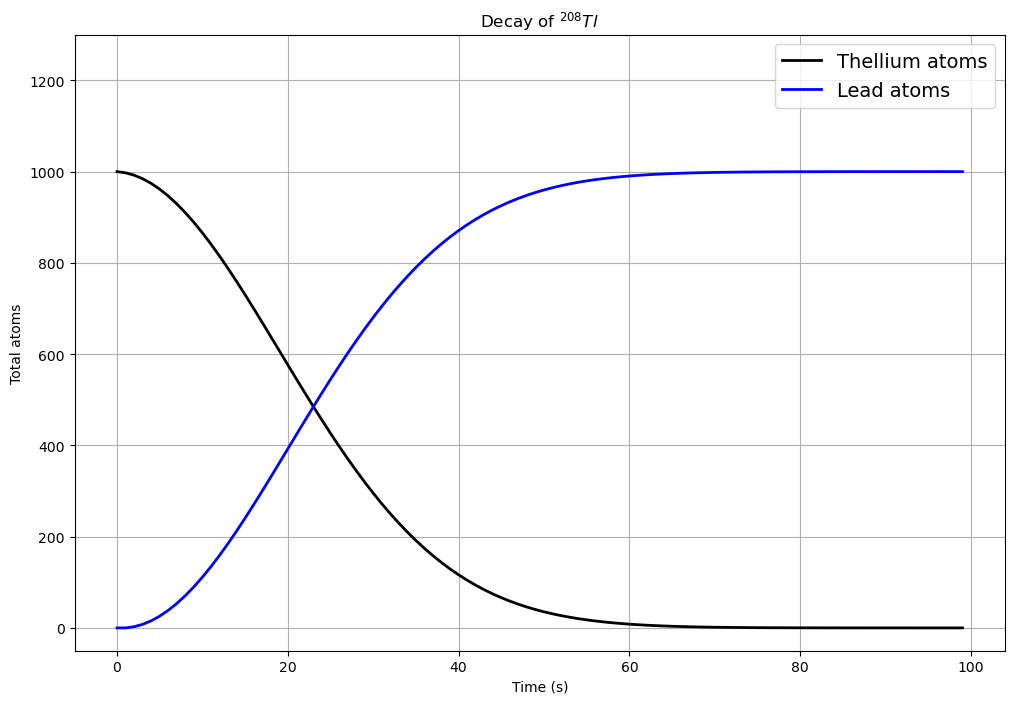

In [4]:
Probab = lambda t, tau: (1 - 2**(-t/tau))
tauF = lambda tHalf: tHalf/np.log(2)

tHalf = 183.13
Time = np.arange(100)
tau = tauF(tHalf)


Atoms = {
   'Tl': [1000],
   'Pb': [0]
}

for i, t in enumerate(Time, start=0):

   ProbabOfDecay = Probab(t, tau)
   Atoms['Tl'].append(Atoms['Tl'][i] - Atoms['Tl'][i]*ProbabOfDecay)
   Atoms['Pb'].append(Atoms['Tl'][0] - Atoms['Tl'][i])


plt.figure(figsize = (12, 8))
plt.plot(Time, Atoms['Tl'][1:], color="black", label="Thellium atoms", lw = 2)
plt.plot(Time, Atoms['Pb'][1:], color="blue", label="Lead atoms", lw = 2)
plt.xlabel("Time (s)")
plt.ylabel("Total atoms")
plt.ylim(-50, 1300)
plt.title(r"Decay of $^{208}Tl$")
plt.grid(True)
plt.legend(fontsize = 14)

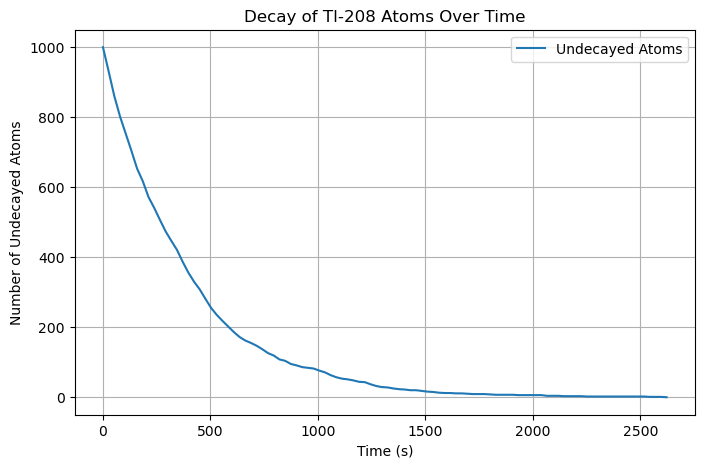

In [4]:
#Using invers transform method:

#I'M INVERTING THE CUMULATIVE DF, SO THE INTEGRAL BETWEEN 0 AND t OF THE NON UNIFORM PDF
InverseMethod = lambda UniformDist, tau: -tau*np.log(UniformDist)/np.log(2)

RandomDataset = npr.random(1000)

Func = InverseMethod(RandomDataset, tau)

time_bins = np.linspace(0, max(Func), 100)
undecayed_counts = [np.sum(Func > t) for t in time_bins]

plt.figure(figsize=(8, 5))
plt.plot(time_bins, undecayed_counts, label="Undecayed Atoms")
plt.xlabel("Time (s)")
plt.ylabel("Number of Undecayed Atoms")
plt.title("Decay of Tl-208 Atoms Over Time")
plt.grid()
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [5]:
def Theta(Z, e, e0, E, b):
   return 2*np.arctan(Z*e**2/(2*np.pi*e0*E*b))


a0 = 5.29e-11
e = 1.602e-19     #C
e0 = 8.854e-12
E = 7.7e6*e


CovMat = np.array([[1/100, 0],[0, 1/100]])

CovMat

array([[0.01, 0.  ],
       [0.  , 0.01]])

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The error is evaluated as

$$\sigma = \frac{\sqrt{N_{\text{hits}} (N_{\text{total}} - N_{\text{hits}})}}{N_{\text{total}}^2}$$


In [6]:
def f(x):
   return np.sin(1/(x*(2-x)))**2

N = int(1e6)
counts = 0
for i in range(N):
   x = 2*np.random.random()
   y = np.random.random()

   if y < f(x):
      counts += 1

I = 2*counts/N

sigma = np.sqrt(counts*(N-counts))/N**2
print(f"Using the hit/miss method the integral is: {I} +- {sigma}")

#Using mean value:

sum = 0
functioneval = []
for i in range(N):
   x = 2*np.random.random()
   sum += f(x)
   functioneval.append(f(x))

IMean = 2/N*sum
SigmaM = 2*np.sqrt(np.var(functioneval))/np.sqrt(N)

print(f"The integral using the mean method is: {IMean} +- {SigmaM}")

Using the hit/miss method the integral is: 1.451766 +- 4.460682350392146e-07
The integral using the mean method is: 1.4517125515750282 +- 0.0005271198622764313


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
#1D

counts1D, counts10D = 0, 0

N = int(1e6)

x = npr.uniform(-1, 1, N)
y = npr.uniform(-1, 1, N)

IsInside = x**2 + y**2 <= 1

I1D = 4* np.sum(IsInside)/N

print(f"The volume of a 1D circle is: {I1D}")

x10D = npr.uniform(-1, 1, (10, N))

IsInside10 = np.sum(x10D**2, axis = 0) <= 1


#1024 is the volume of a 10 dimensional cube of lenght l = 2
I10D = 1024*np.sum(IsInside10)/N
print(f"The volume of a 10D circle is: {I10D}")

The volume of a 1D circle is: 3.142824
The volume of a 10D circle is: 2.596864


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

0.8390390647345035


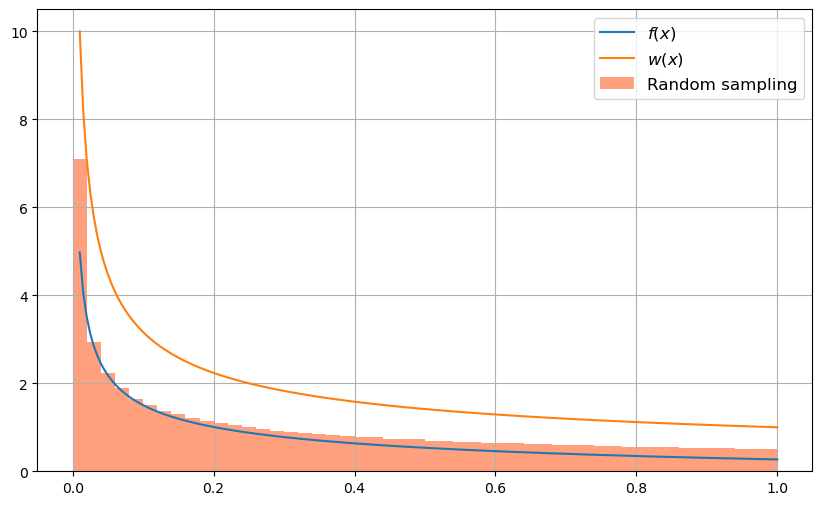

In [40]:
f = lambda x: 1/(np.sqrt(x)*(np.exp(x) + 1))
w = lambda x: 1/np.sqrt(x)

x = np.linspace(0.01, 1, 200)
Bound = [0, 1]


N = int(1e6)

#I have to drawn random points from the w(x) distribution! Using the inverse mathod 1/sqrt(x) = x**2 so:

RandomX = npr.uniform(0, 1, N)**2

#I have to multiply the for the integral of w(x), which is 2!
Integral = 1/N * np.sum(f(RandomX)/w(RandomX)) * 2

print(Integral)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=r"$f(x)$")
plt.plot(x, w(x), label=r"$w(x)$")
plt.hist(RandomX, density = True, bins = 50, color = 'orangered', alpha = 0.5, label = "Random sampling")
plt.grid(True)
plt.legend(fontsize = 12)